In [ ]:
!nvidia-smi

Sat Oct  3 16:43:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.
x_test = x_test/255.

AutoEncoder : MNIST
======
model generation
------

In [ ]:
z_dim = 2

In [ ]:
enc_inp = keras.Input(shape=(28,28,1)) 
enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc_inp)
enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc)
enc = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(enc)
enc = layers.Flatten()(enc)
enc_out = layers.Dense(z_dim, activation = None)(enc)
encoder = keras.Model(inputs = enc_inp, outputs = enc_out)
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1154      
Total params: 29,218
Trainable params: 29,218
Non-trainable params: 0
__________________________________________________

In [ ]:
dec_inp = keras.Input(shape=(z_dim)) 
dec = layers.Dense(3*3*64, activation=None)(dec_inp)
dec = layers.Reshape((3,3,64))(dec)
dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(dec)
dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
dec_out = layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(dec)
decoder = keras.Model(inputs = dec_inp, outputs = dec_out)
decoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 576)               1728      
_________________________________________________________________
reshape (Reshape)            (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)        

In [ ]:
ae_inp = encoder.inputs
ae_latent = encoder(ae_inp)
ae_out = decoder(ae_latent)
ae = keras.Model(inputs = ae_inp, outputs = ae_out)   # ae 를 train 하면 encoder, decoder 모두 각각 train 된다.
ae.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
functional_1 (Functional)    (None, 2)                 29218     
_________________________________________________________________
functional_3 (Functional)    (None, 28, 28, 1)         38977     
Total params: 68,195
Trainable params: 68,195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ae.compile(optimizer='adam', loss='binary_crossentropy')  # pixel값인 0 ~ 1 으로 학습.
callback_list = [EarlyStopping(monitor = 'val_loss', patience = 15, restore_best_weights = True)]
ae.fit(x_train, x_train, validation_data = (x_test, x_test), callbacks = callback_list, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2368 - val_loss: 0.2139
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2118 - val_loss: 0.2091
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2066 - val_loss: 0.2015
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2031 - val_loss: 0.2087
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2063 - val_loss: 0.2068
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2073 - val_loss: 0.2024
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2049 - val_loss: 0.2220
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2048 - val_loss: 0.2089
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1981 - val_loss: 0.1965
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

AE model test
-------

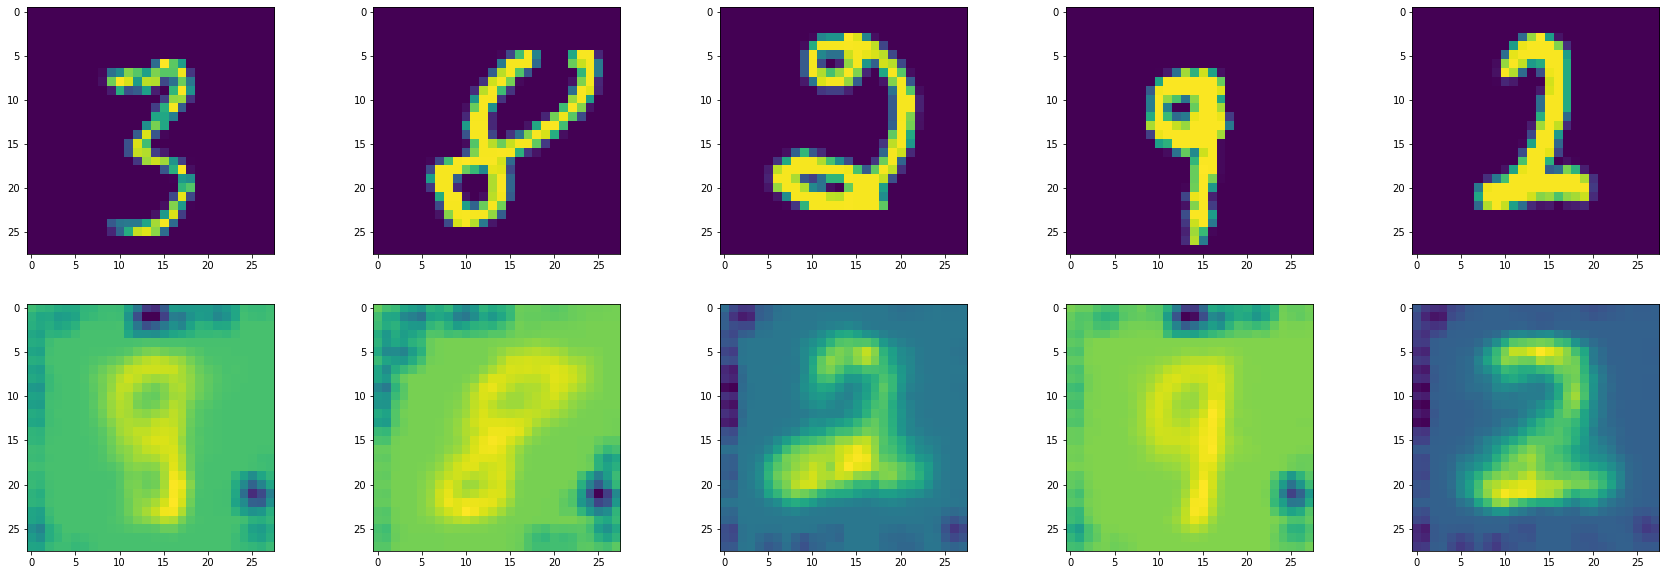

In [ ]:
def show_origianl_and_modified(model, num = 5):
    idx = np.random.randint(0,len(x_test), size = num)
    plt.rcParams['figure.figsize'] = [6*num, 10]
    fig = plt.figure()
    for i in range(num):
        target = x_test[idx[i]]
        ax_origin = fig.add_subplot(2, num, i+1)   # 윗줄은 원본
        ax_origin.imshow(target.reshape(28,28))
        ax_modifi = fig.add_subplot(2, num, num + i+1)   # 아래줄은 만들어진것
        ax_modifi.imshow(model.predict(target.reshape(1,28,28,1)).reshape(28,28))  # ae -> vae
    plt.show()

show_origianl_and_modified(ae)

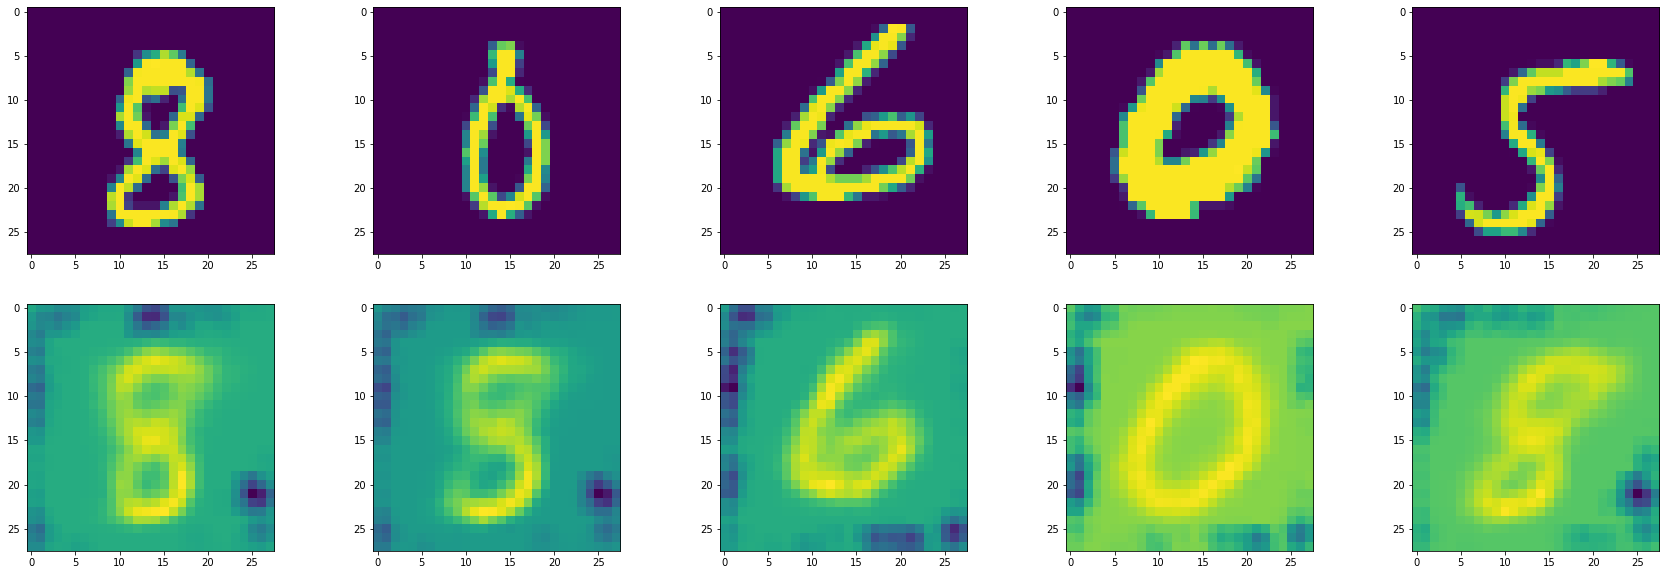

In [ ]:
show_origianl_and_modified(ae)

What does the latent space look like?
---------

In [ ]:
import pandas as pd

In [ ]:
def latent_space_scatter(x, y):  # only works for z_dim = 2
    x_latent = encoder.predict(x)
    data = pd.DataFrame(x_latent, columns = ['l1','l2'])
    data['number'] = y
    groups = data.groupby('number')
    plt.rcParams['figure.figsize'] = [20, 20]
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group.l1, group.l2, marker='.', linestyle='',label=name)
    ax.legend(fontsize=12, loc='upper left') # legend position
    plt.title('Latent space scatter', fontsize=20)
    plt.xlabel('l1', fontsize=14)
    plt.ylabel('l2', fontsize=14)
    plt.show()

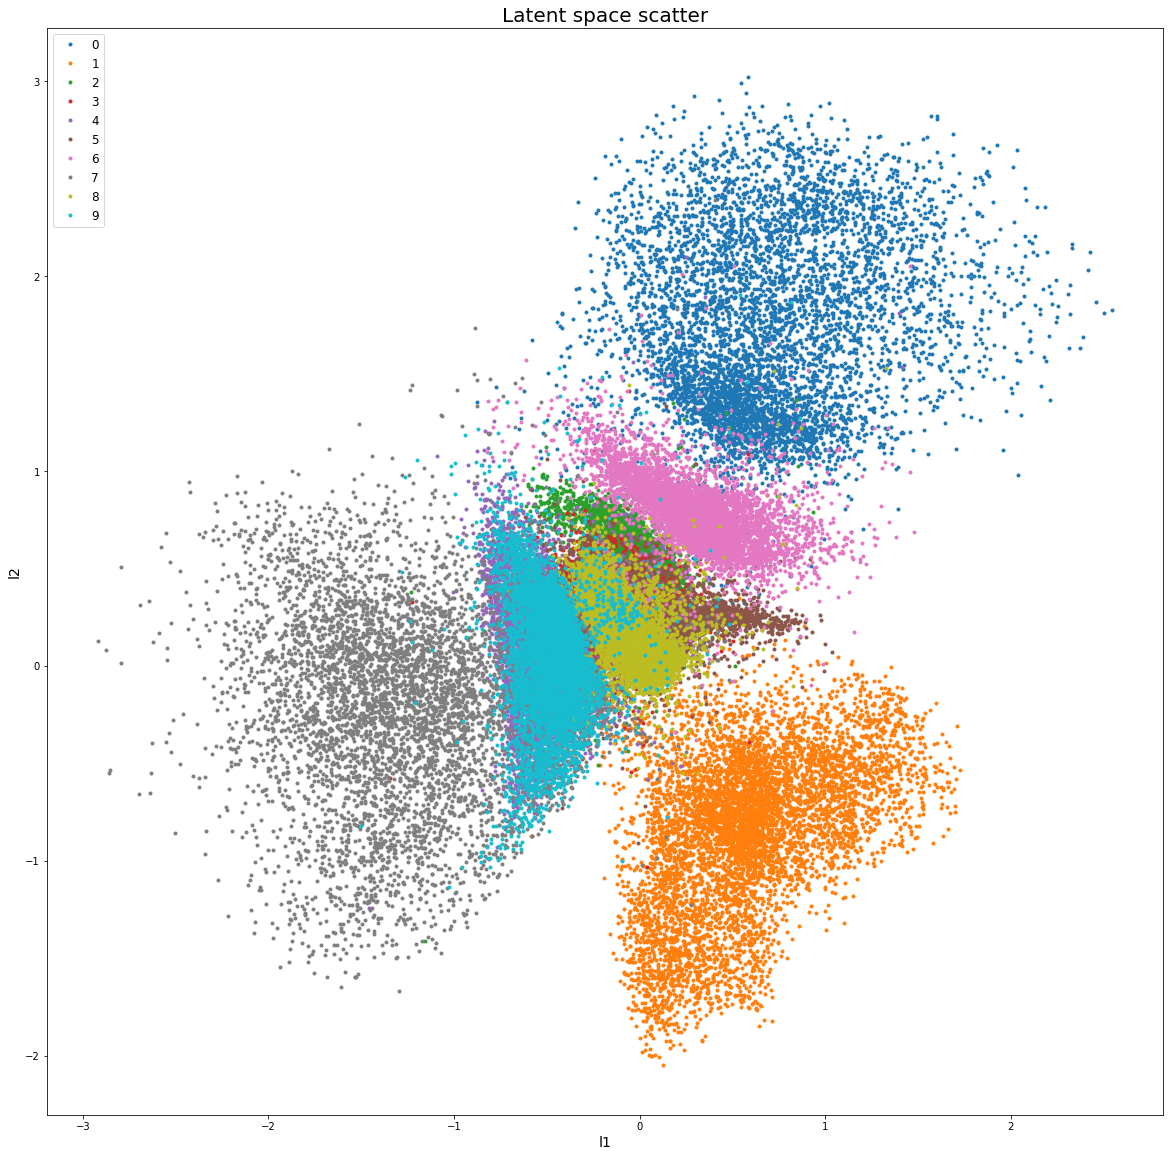

In [ ]:
latent_space_scatter(x_train, y_train)

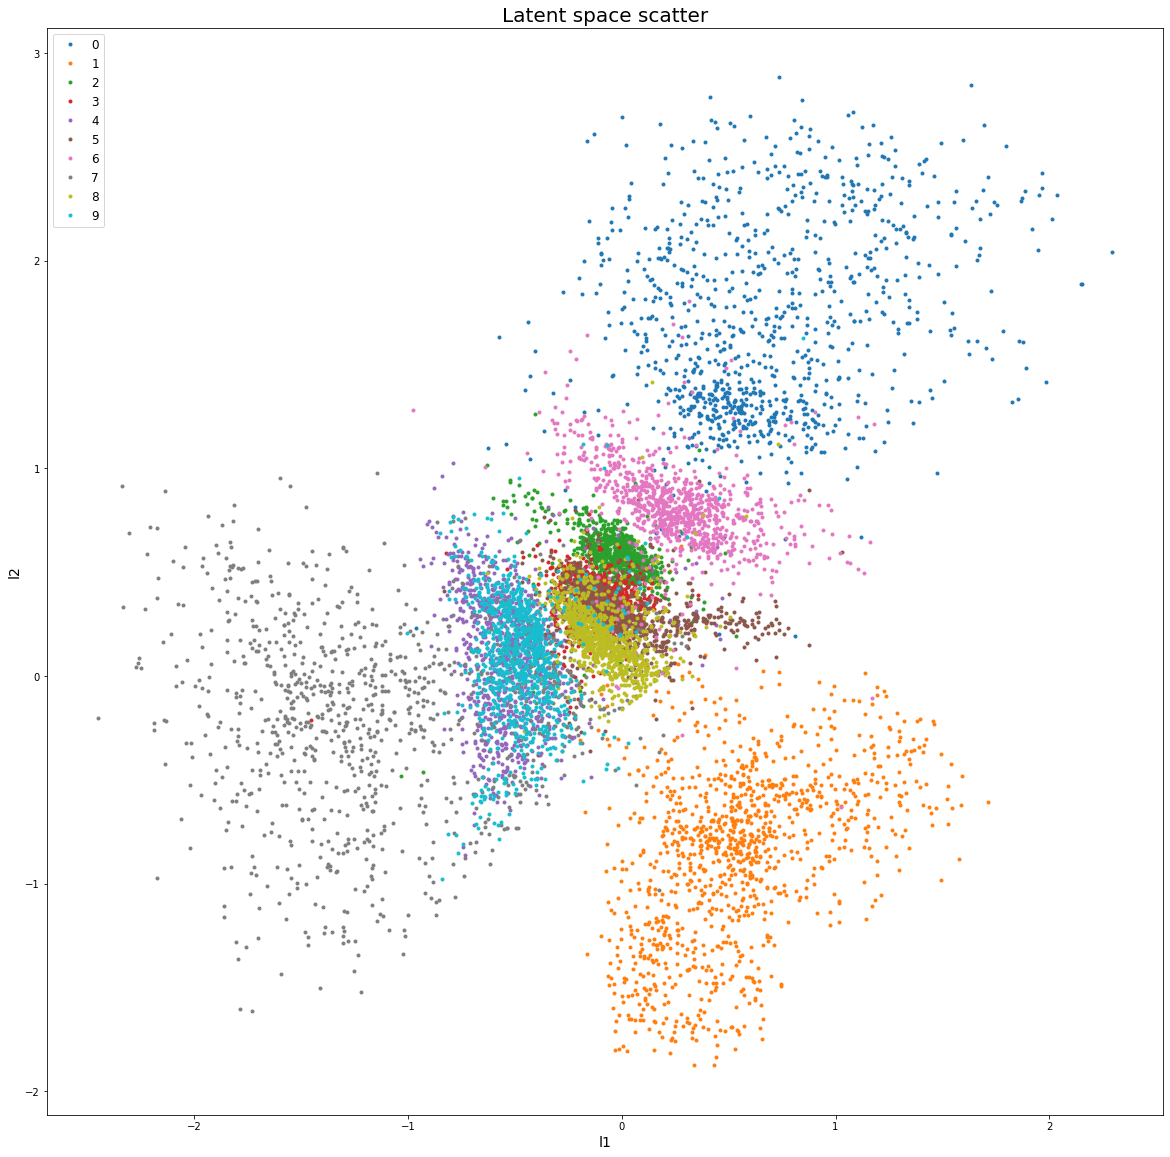

In [ ]:
latent_space_scatter(x_test, y_test)

AE in class form
-----------

In [ ]:
class AE(keras.Model):
    def __init__(self, z_dim, name="autoencoder", **kwargs):
        super(AE, self).__init__(name = name, **kwargs)
        self.x_dim = (28, 28, 1)
        self.z_dim = z_dim
        self.encoder = self.get_encoder()
        self.decoder = self.get_decoder()

    def get_encoder(self):
        enc_inp = keras.Input(shape=(28,28,1)) 
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc_inp)
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc)
        enc = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(enc)
        enc = layers.Flatten()(enc)
        enc_out = layers.Dense(self.z_dim, activation = None)(enc)
        encoder = keras.Model(inputs = enc_inp, outputs = enc_out)
        return encoder
    
    def get_decoder(self):
        dec_inp = keras.Input(shape=(self.z_dim)) 
        dec = layers.Dense(3*3*64, activation=None)(dec_inp)
        dec = layers.Reshape((3,3,64))(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec_out = layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(dec)
        decoder = keras.Model(inputs = dec_inp, outputs = dec_out)
        return decoder
    
    def call(self, x_input):
        z = self.encoder(x_input)
        out = self.decoder(z)
        return out

In [ ]:
ae = AE(z_dim = z_dim)
ae.compile(optimizer='adam', loss='binary_crossentropy')  # pixel값인 0 ~ 1 로 학습.
callback_list = [EarlyStopping(monitor = 'val_loss', patience = 15, restore_best_weights = True)]
ae.fit(x_train, x_train, validation_data = (x_test, x_test), callbacks = callback_list, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2339 - val_loss: 0.2177
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2113 - val_loss: 0.2115
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2032 - val_loss: 0.1984
Epoch 4/100
 672/1875 [=========>....................] - ETA: 4s - loss: 0.2023

KeyboardInterrupt: ignored

VAE : MNIST
==========
VAE in class form
-----

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
class VAE(keras.Model):
    def __init__(self, z_dim, kl_weight = 1, name="VAE", **kwargs):
        super(VAE, self).__init__(name = name, **kwargs)
        self.x_dim = (28, 28, 1)
        self.z_dim = z_dim
        self.encoder = self.get_encoder()
        self.decoder = self.get_decoder()
        self.kl_weight = kl_weight
        
    def get_encoder(self):
        enc_inp = keras.Input(shape=(28,28,1)) 
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc_inp)
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc)
        enc = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(enc)
        enc = layers.Flatten()(enc)
        enc_out = layers.Dense(self.z_dim * 2, activation = None)(enc)
        encoder = keras.Model(inputs = enc_inp, outputs = enc_out)
        return encoder
    
    def get_decoder(self):
        dec_inp = keras.Input(shape=(self.z_dim)) 
        dec = layers.Dense(3*3*64, activation=None)(dec_inp)
        dec = layers.Reshape((3,3,64))(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec_out = layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(dec)
        decoder = keras.Model(inputs = dec_inp, outputs = dec_out)
        return decoder
    
    def encode(self, x_input):
        mu, rho = tf.split(self.encoder(x_input), num_or_size_splits = 2, axis = 1)
        sd = tf.math.log(1 + tf.math.exp(rho))  # rho 가 0 이하가 되는 경우를 제거한다.
        z_sample = mu + sd * tf.random.normal(shape = (self.z_dim,))
        return z_sample, mu, sd
    
    def call(self, x_input):
        z_sample, mu, sd = self.encode(x_input)
        kl_divergence = tf.math.reduce_mean(- 0.5 * tf.math.reduce_sum(1 + tf.math.log(tf.math.square(sd)) - tf.math.square(mu) - tf.math.square(sd), axis=1))
        out = self.decoder(z_sample)
        # model class 에는 add_loss 가 있는데, 이미 keras.Model 을 상속받았으므로 가능하다.
        self.add_loss(self.kl_weight * kl_divergence)
        return out

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2978 - val_loss: 0.2652
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2651 - val_loss: 0.2644
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - val_loss: 0.2639
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - val_loss: 0.2675
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2669 - val_loss: 0.2648
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2653 - val_loss: 0.2651
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2646 - val_loss: 0.2639
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - val_loss: 0.2651
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2652 - val_loss: 0.2639
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

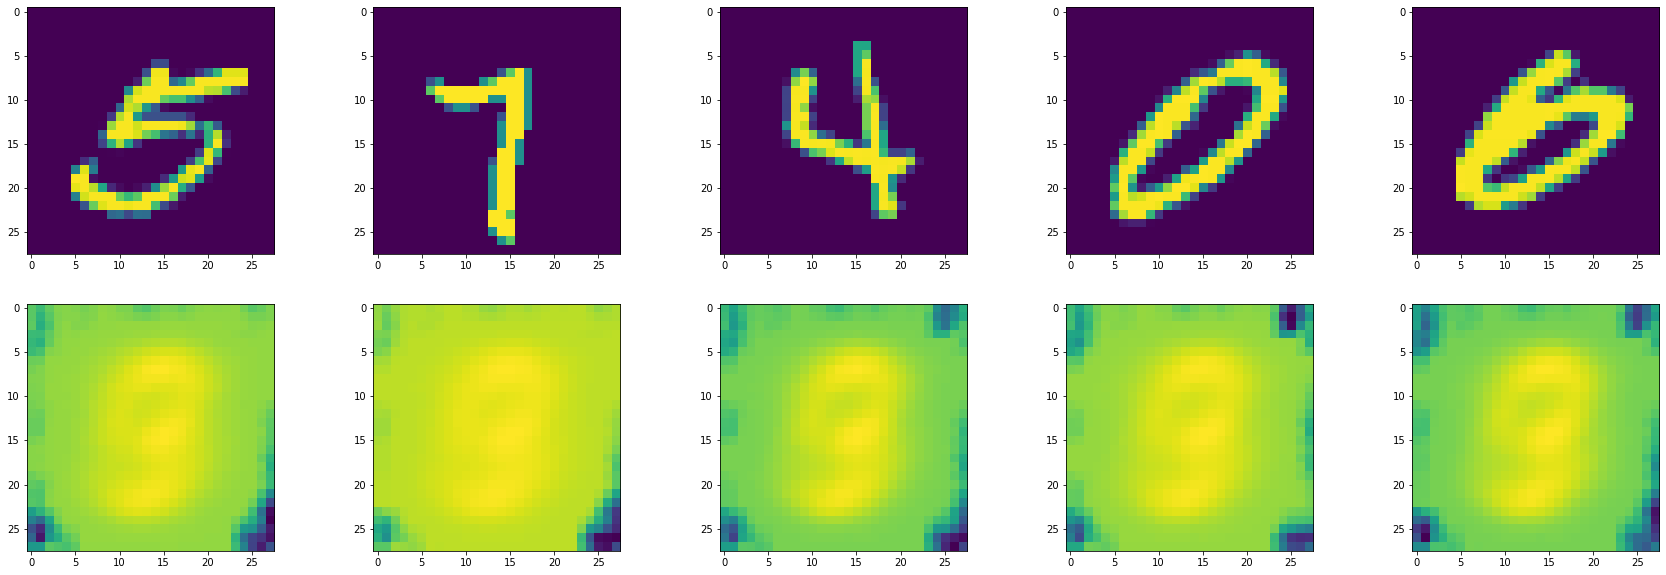

In [ ]:
z_dim = 16
kl_w = 3
# compile and train tfk.Model
vae = VAE(z_dim=z_dim, kl_weight=kl_w)
vae.compile(optimizer = 'adam', loss = 'binary_crossentropy')
callback_list = [EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)]
vae.fit(x_train, x_train, validation_data = (x_test, x_test), callbacks = callback_list, epochs = 100)
show_origianl_and_modified(vae)

using custom loss

In [ ]:
def custom_sigmoid_cross_entropy_loss_with_logits(x_true, x_recons_logits):
    raw_cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x_true, logits=x_recons_logits)
    neg_log_likelihood = tf.math.reduce_sum(raw_cross_entropy, axis = [0,1,2])  #  axis = [0,1,2] 조절
    return neg_log_likelihood    #  tf.math.reduce_mean(neg_log_likelihood)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 3760.1992 - val_loss: 2654.6763
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2615.1931 - val_loss: 2522.2227
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2504.7126 - val_loss: 2440.3696
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2443.1135 - val_loss: 2397.4006
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2403.1787 - val_loss: 2370.0515
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2370.6506 - val_loss: 2361.2727
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2351.2854 - val_loss: 2334.3027
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2331.0173 - val_loss: 2321.1755
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2317.4114 - val_loss: 2291.6167
Epoch 10/100
1875/1

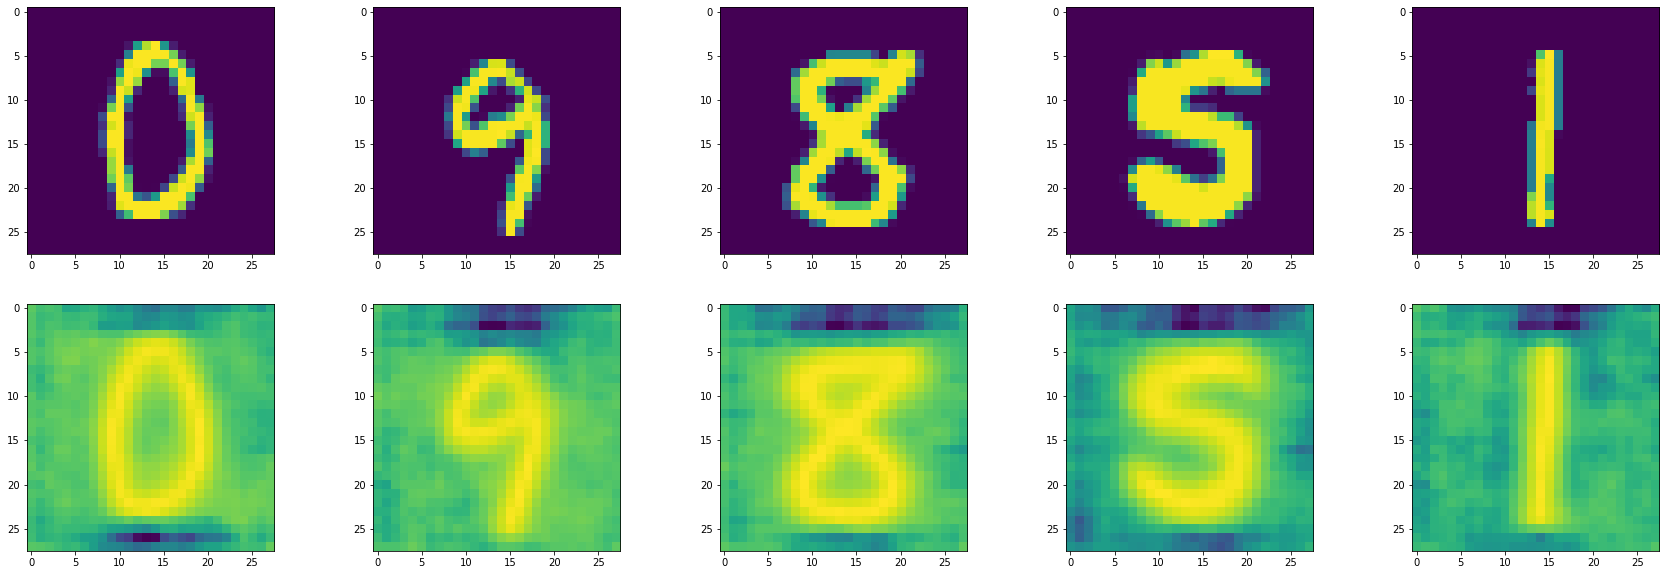

In [ ]:
z_dim = 16
kl_w = 3
# compile and train tfk.Model
vae = VAE(z_dim=z_dim, kl_weight=kl_w)
vae.compile(optimizer = 'adam', loss = custom_sigmoid_cross_entropy_loss_with_logits)
callback_list = [EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)]
vae.fit(x_train, x_train, validation_data = (x_test, x_test), callbacks = callback_list, epochs = 100)
show_origianl_and_modified(vae)

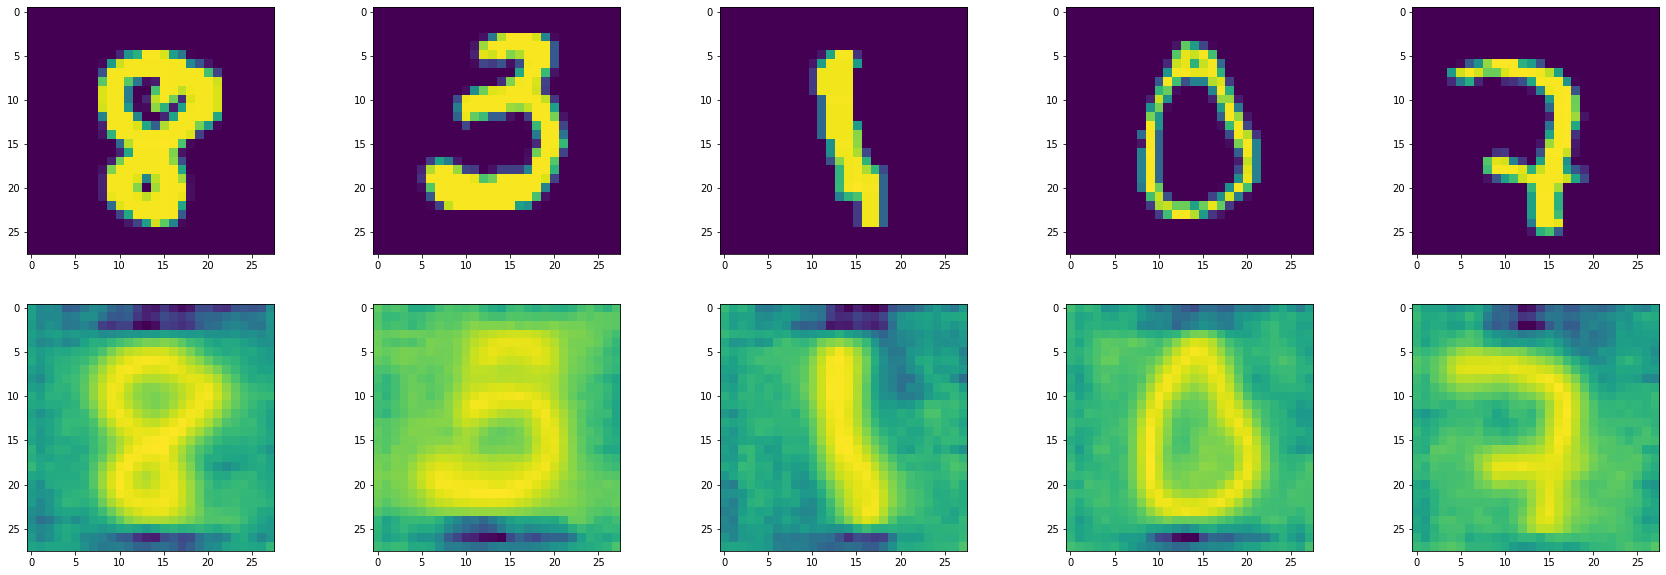

In [ ]:
show_origianl_and_modified(vae)

VAE : CIFAR10
=========

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
class VAE(keras.Model):
    def __init__(self, z_dim, kl_weight = 1, name="VAE", **kwargs):
        super(VAE, self).__init__(name = name, **kwargs)
        self.x_dim = (32, 32, 3)
        self.z_dim = z_dim
        self.encoder = self.get_encoder()
        self.decoder = self.get_decoder()
        self.kl_weight = kl_weight
        
    def get_encoder(self):
        enc_inp = keras.Input(shape=(32,32,3)) 
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc_inp)
        enc = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu')(enc)
        enc = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(enc)
        enc = layers.Flatten()(enc)
        enc_out = layers.Dense(self.z_dim * 2, activation = None)(enc)
        encoder = keras.Model(inputs = enc_inp, outputs = enc_out)
        # print(encoder.summary())
        return encoder
    
    def get_decoder(self):
        dec_inp = keras.Input(shape=(self.z_dim)) 
        dec = layers.Dense(4*4*64, activation=None)(dec_inp)
        dec = layers.Reshape((4,4,64))(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec = layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu')(dec)
        dec_out = layers.Conv2DTranspose(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(dec)
        decoder = keras.Model(inputs = dec_inp, outputs = dec_out)
        # print(decoder.summary())
        return decoder
    
    def encode(self, x_input):
        mu, rho = tf.split(self.encoder(x_input), num_or_size_splits = 2, axis = 1)
        sd = tf.math.log(1 + tf.math.exp(rho))  # rho 가 0 이하가 되는 경우를 제거한다.
        z_sample = mu + sd * tf.random.normal(shape = (self.z_dim,))
        return z_sample, mu, sd
    
    def call(self, x_input):
        z_sample, mu, sd = self.encode(x_input)
        kl_divergence = tf.math.reduce_mean(- 0.5 * tf.math.reduce_sum(1 + tf.math.log(tf.math.square(sd)) - tf.math.square(mu) - tf.math.square(sd), axis=1))
        out = self.decoder(z_sample)
        # model class 에는 add_loss 가 있는데, 이미 keras.Model 을 상속받았으므로 가능하다.
        self.add_loss(self.kl_weight * kl_divergence)
        return out

In [ ]:
def custom_sigmoid_cross_entropy_loss_with_logits(x_true, x_recons_logits):
    raw_cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x_true, logits=x_recons_logits)
    neg_log_likelihood = tf.math.reduce_sum(raw_cross_entropy, axis = [0,1,2])  #  axis = [0,1,2, 3] 조절
    return tf.math.reduce_mean(neg_log_likelihood)    #  tf.math.reduce_mean(neg_log_likelihood)

In [ ]:
def show_origianl_and_modified(model, num = 5):
    idx = np.random.randint(0,len(x_test), size = num)
    plt.rcParams['figure.figsize'] = [6*num, 10]
    fig = plt.figure()
    for i in range(num):
        target = x_test[idx[i]]
        ax_origin = fig.add_subplot(2, num, i+1)   # 윗줄은 원본
        ax_origin.imshow(target)
        ax_modifi = fig.add_subplot(2, num, num + i+1)   # 아래줄은 만들어진것
        ax_modifi.imshow(model.predict(target.reshape(1,32,32,3)).reshape(32,32,3))  # ae -> vae
    plt.show()

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 20247.3516 - val_loss: 19566.2715
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 19368.8105 - val_loss: 19264.3711
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 19213.3711 - val_loss: 19182.8281
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 19137.8359 - val_loss: 19130.8672
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 19076.9219 - val_loss: 19083.0664
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 19050.6074 - val_loss: 19097.0039
Epoch 7/100
1563/1563 [==============================] - 10s 6ms/step - loss: 19023.2246 - val_loss: 19030.1953
Epoch 8/100
1563/1563 [==============================] - 9s 6ms/step - loss: 19004.2422 - val_loss: 19016.9062
Epoch 9/100
1563/1563 [==============================] - 10s 6ms/step - loss: 18994.0820 - val_loss: 19026

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


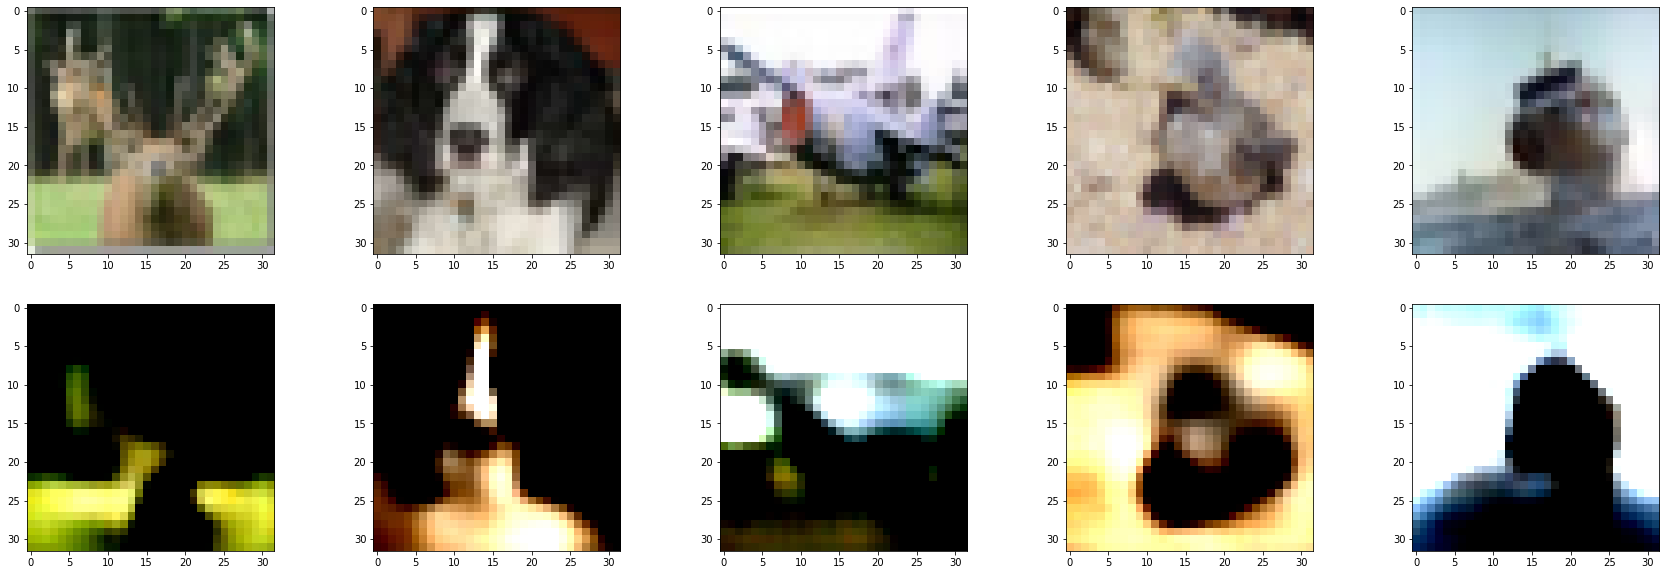

In [ ]:
z_dim = 64
kl_w = 3
# compile and train tfk.Model
vae = VAE(z_dim=z_dim, kl_weight=kl_w)
vae.compile(optimizer = 'adam', loss = custom_sigmoid_cross_entropy_loss_with_logits)
callback_list = [EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)]
vae.fit(x_train, x_train, validation_data = (x_test, x_test), callbacks = callback_list, epochs = 100)
show_origianl_and_modified(vae)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


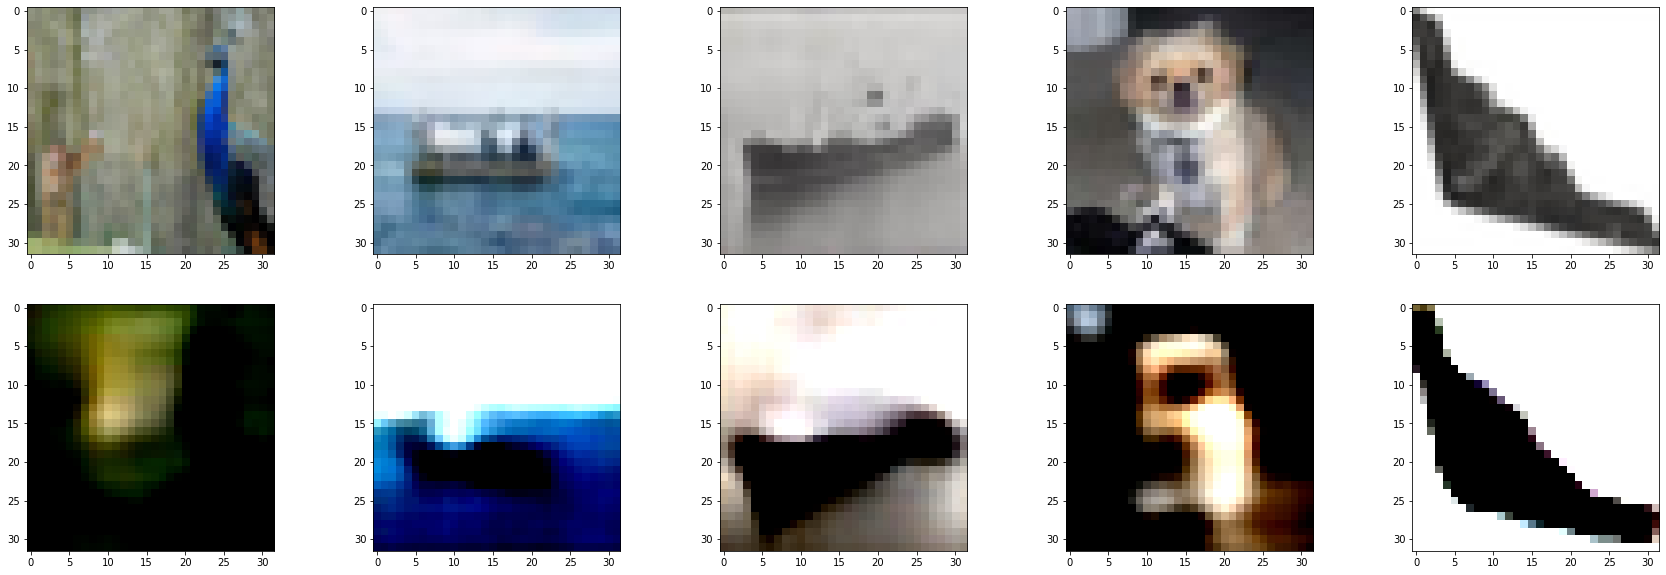

In [ ]:
show_origianl_and_modified(vae)